In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score



In [126]:
df = pd.read_csv(r"C:\Users\WELCOME\OneDrive\Desktop\Learning\Enemble_Learning\classification_shape_datasets\xor_dataset.csv")

In [127]:
# plt.plot(x=df[0])
x = np.array(df.iloc[:,:2])
y = df.iloc[:,-1]
y

0      0
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: y, Length: 1000, dtype: int64

<Axes: >

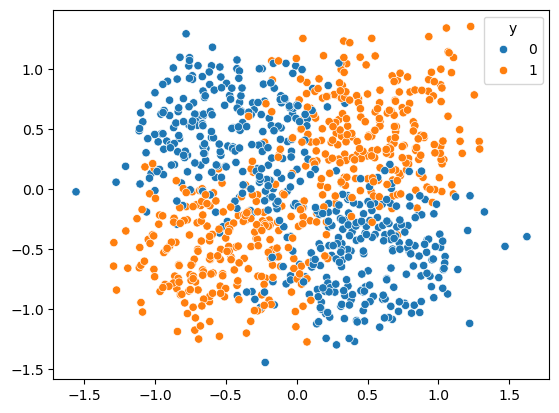

In [128]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [129]:



esti = [LogisticRegression(),DecisionTreeClassifier(),SVC()]

In [130]:
for m in esti:
    a = cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print(m," ",np.round(np.mean(a),2))


LogisticRegression()   0.48
DecisionTreeClassifier()   0.83
SVC()   0.84


Bagging


In [147]:




def giveBaggingClassifierAction(m,n_sampl2,n_esti,n_feature,bootsap=True,boot_fest=False):


    bc = BaggingClassifier(m,n_estimators=n_esti,bootstrap=bootsap,max_samples=n_sampl2,random_state=42)
    sc = cross_val_score(bc,x,y,cv=10,scoring='accuracy')
    bc.fit(x,y)
    print(m," ",np.round(sc.mean(),2))
    # Create a grid to evaluate model
    xx, yy = np.meshgrid(
        np.linspace(x[:,0].min()-1, x[:,0].max()+1, 500),
        np.linspace(x[:,1].min()-1, x[:,1].max()+1, 500)
    )

    # Use the fitted BaggingClassifier to predict
    Z = bc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # colored regions
    plt.scatter(x[:,0], x[:,1], c=y, cmap='coolwarm', s=50, edgecolors='k')  # points

    plt.title("Bagging Classifier Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



DecisionTreeClassifier()   0.85


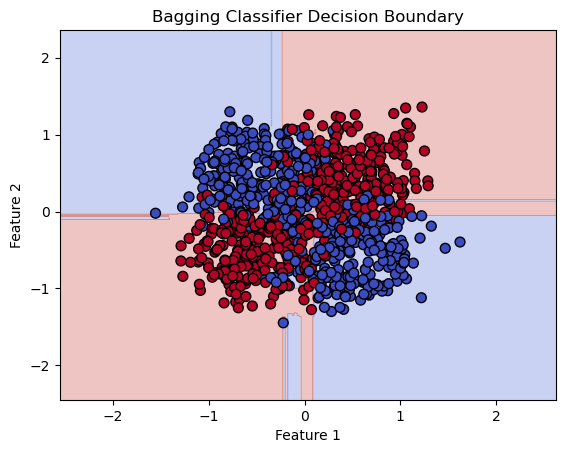

In [150]:
# for m in esti:  # list of base estimators
    # Bagging
giveBaggingClassifierAction(m=esti[1],n_esti=500,n_sampl2=0.50,n_feature=0.0001,bootsap=True,boot_fest=False)

 #   Random Subspace
#    giveBaggingClassifierAction(m, 1.0, 0.6, False, False)
bag = BaggingClassifier(esti[1],random_state=42)
#    # Random Patches
#    giveBaggingClassifierAction(m, 0.6, 0.6, True, True)


In [145]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [10, 50, 100, 200,500,700],        # number of estimators
    'max_samples': [0.15,0.3,0.5, 0.7, 1.0],            # fraction of samples
    # 'max_features': [0.5, 0.7, 1.0],           # fraction of features
    'bootstrap': [True, False,True,False],                # sample data with replacement
    # 'bootstrap_features': [True, False]        # sample features with replacement
}

# Grid search
grid = GridSearchCV(estimator=bag, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x, y)  # X, y = your dataset

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'bootstrap': True, 'max_samples': 0.3, 'n_estimators': 200}
Best CV Accuracy: 0.853
